## Objective

Data consists of observation about vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests.

Data is picked up from UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/wine+quality)

## Data Dictionary

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality_level (1 corresponds to high quality)

### Import Required Packages

In [1]:
# Packages for data handling and data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
# Packages for Classification 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# Packages for CLustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Filter warnings
from warnings import filterwarnings
filterwarnings("ignore")

### Load and describe the data

In [2]:
df = pd.read_csv('wine_quality.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_level
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [4]:
df.shape

(1359, 12)

In [5]:
# Get data summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


In [6]:
# Check data types of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality_level         1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 127.5 KB


In [7]:
# Check for duplicates
df.duplicated().sum()

0

In [8]:
df['quality_level'].value_counts()

1    719
0    640
Name: quality_level, dtype: int64

In [9]:
df['quality_level'].value_counts(normalize = True)

1    0.529065
0    0.470935
Name: quality_level, dtype: float64

#### Observations:

We have 1359 observations and 12 features in the wine dataset.

"quality_level" is the dependent variable. 53% of the observations correspond to 1 (high quality) and 47% of the observations correspond to 0 (not high quality).

All other 11 features or independent variables are of float data type.

There are no duplicates or missing values in the dataset

### Data Cleaning

In [10]:
df.columns=df.columns.str.replace(' ','_')

In [11]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality_level'],
      dtype='object')

### EDA

### Univariate Analysis

In [12]:
df['quality_level'].value_counts()

1    719
0    640
Name: quality_level, dtype: int64

<AxesSubplot:xlabel='quality_level', ylabel='count'>

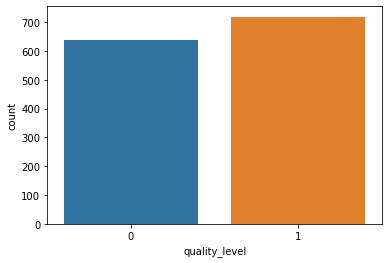

In [13]:
sns.countplot(x='quality_level', data=df)

In [14]:
# Let's get list of all the column names except 'quality_level'
df_col_list = df.columns
df_col_list = df_col_list.drop('quality_level')
len(df_col_list)

11

In [15]:
df_col_list

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

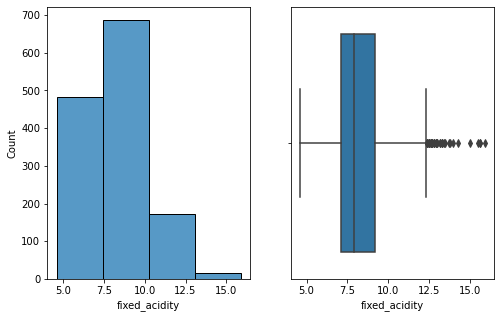

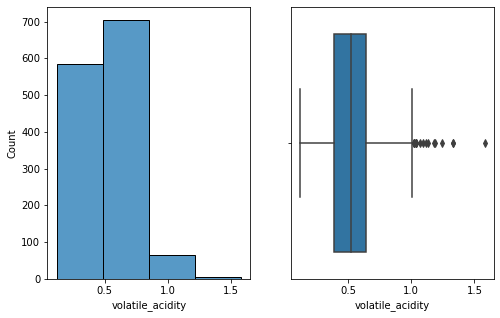

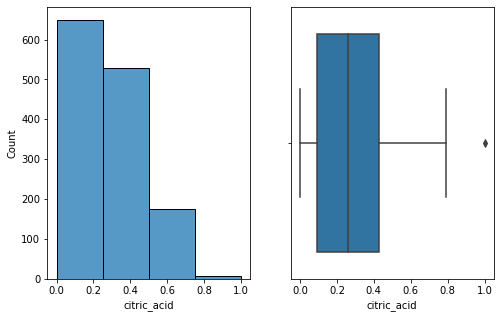

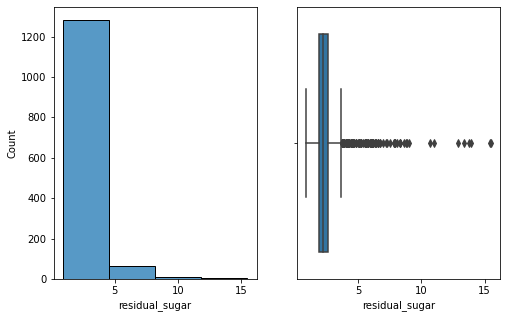

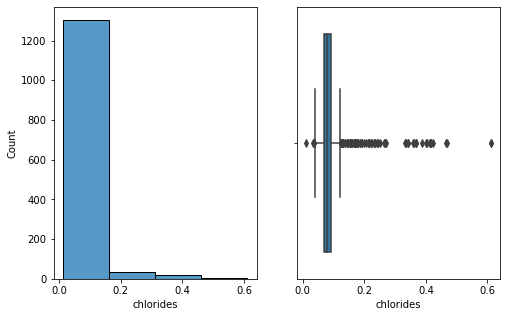

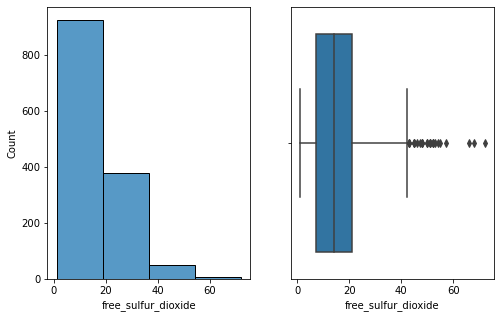

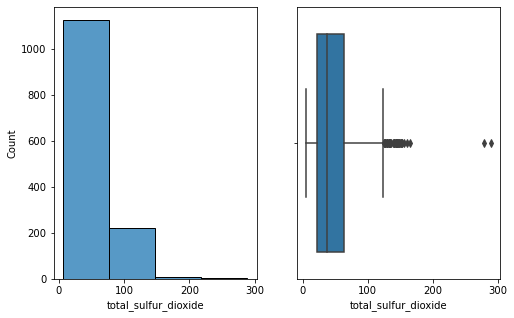

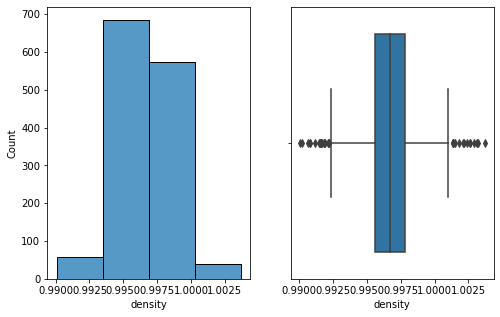

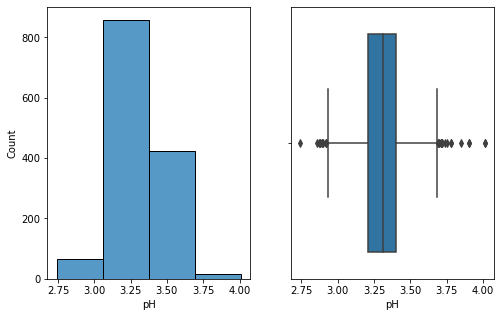

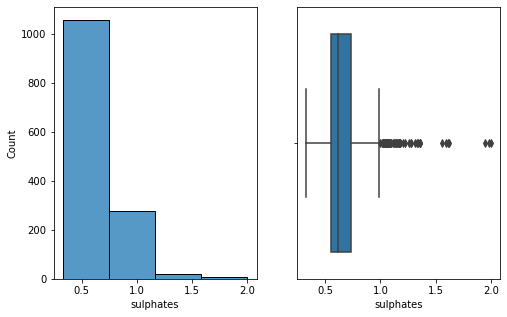

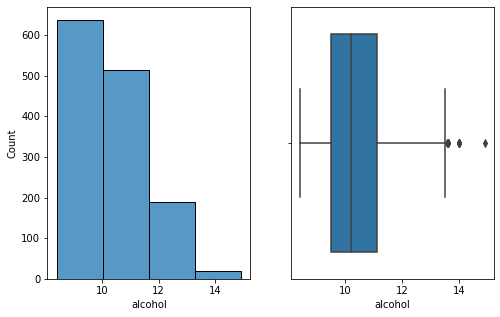

In [16]:
# Univariate analysis of all independent variables
for i in df_col_list:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,5))
    sns.histplot(x=i, data=df, ax=axes[0],bins=4)
    sns.boxplot(x=i, data=df, ax=axes[1])    

#### Observations:

Out of 1359 total observations on wine, 719(53%) corresponding to high quality and 640(47%) correspond to not high quality wines.

'pH', 'volatile acidity', 'density' have a more symmetrical distribution.

'sulphate', 'total sulphur dioxide', 'free sulphur dioxide' are right skewed.

Many of the numeric features have outliers

### Bivariate Analysis

<AxesSubplot:xlabel='quality_level', ylabel='alcohol'>

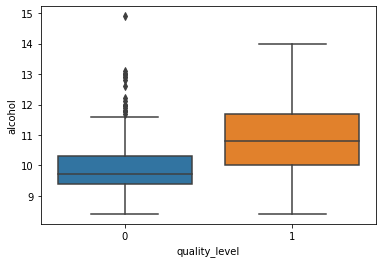

In [17]:
sns.boxplot(x='quality_level',y='alcohol', data=df)

#### Observation:

Median alcohol for high quality red wine is higher.

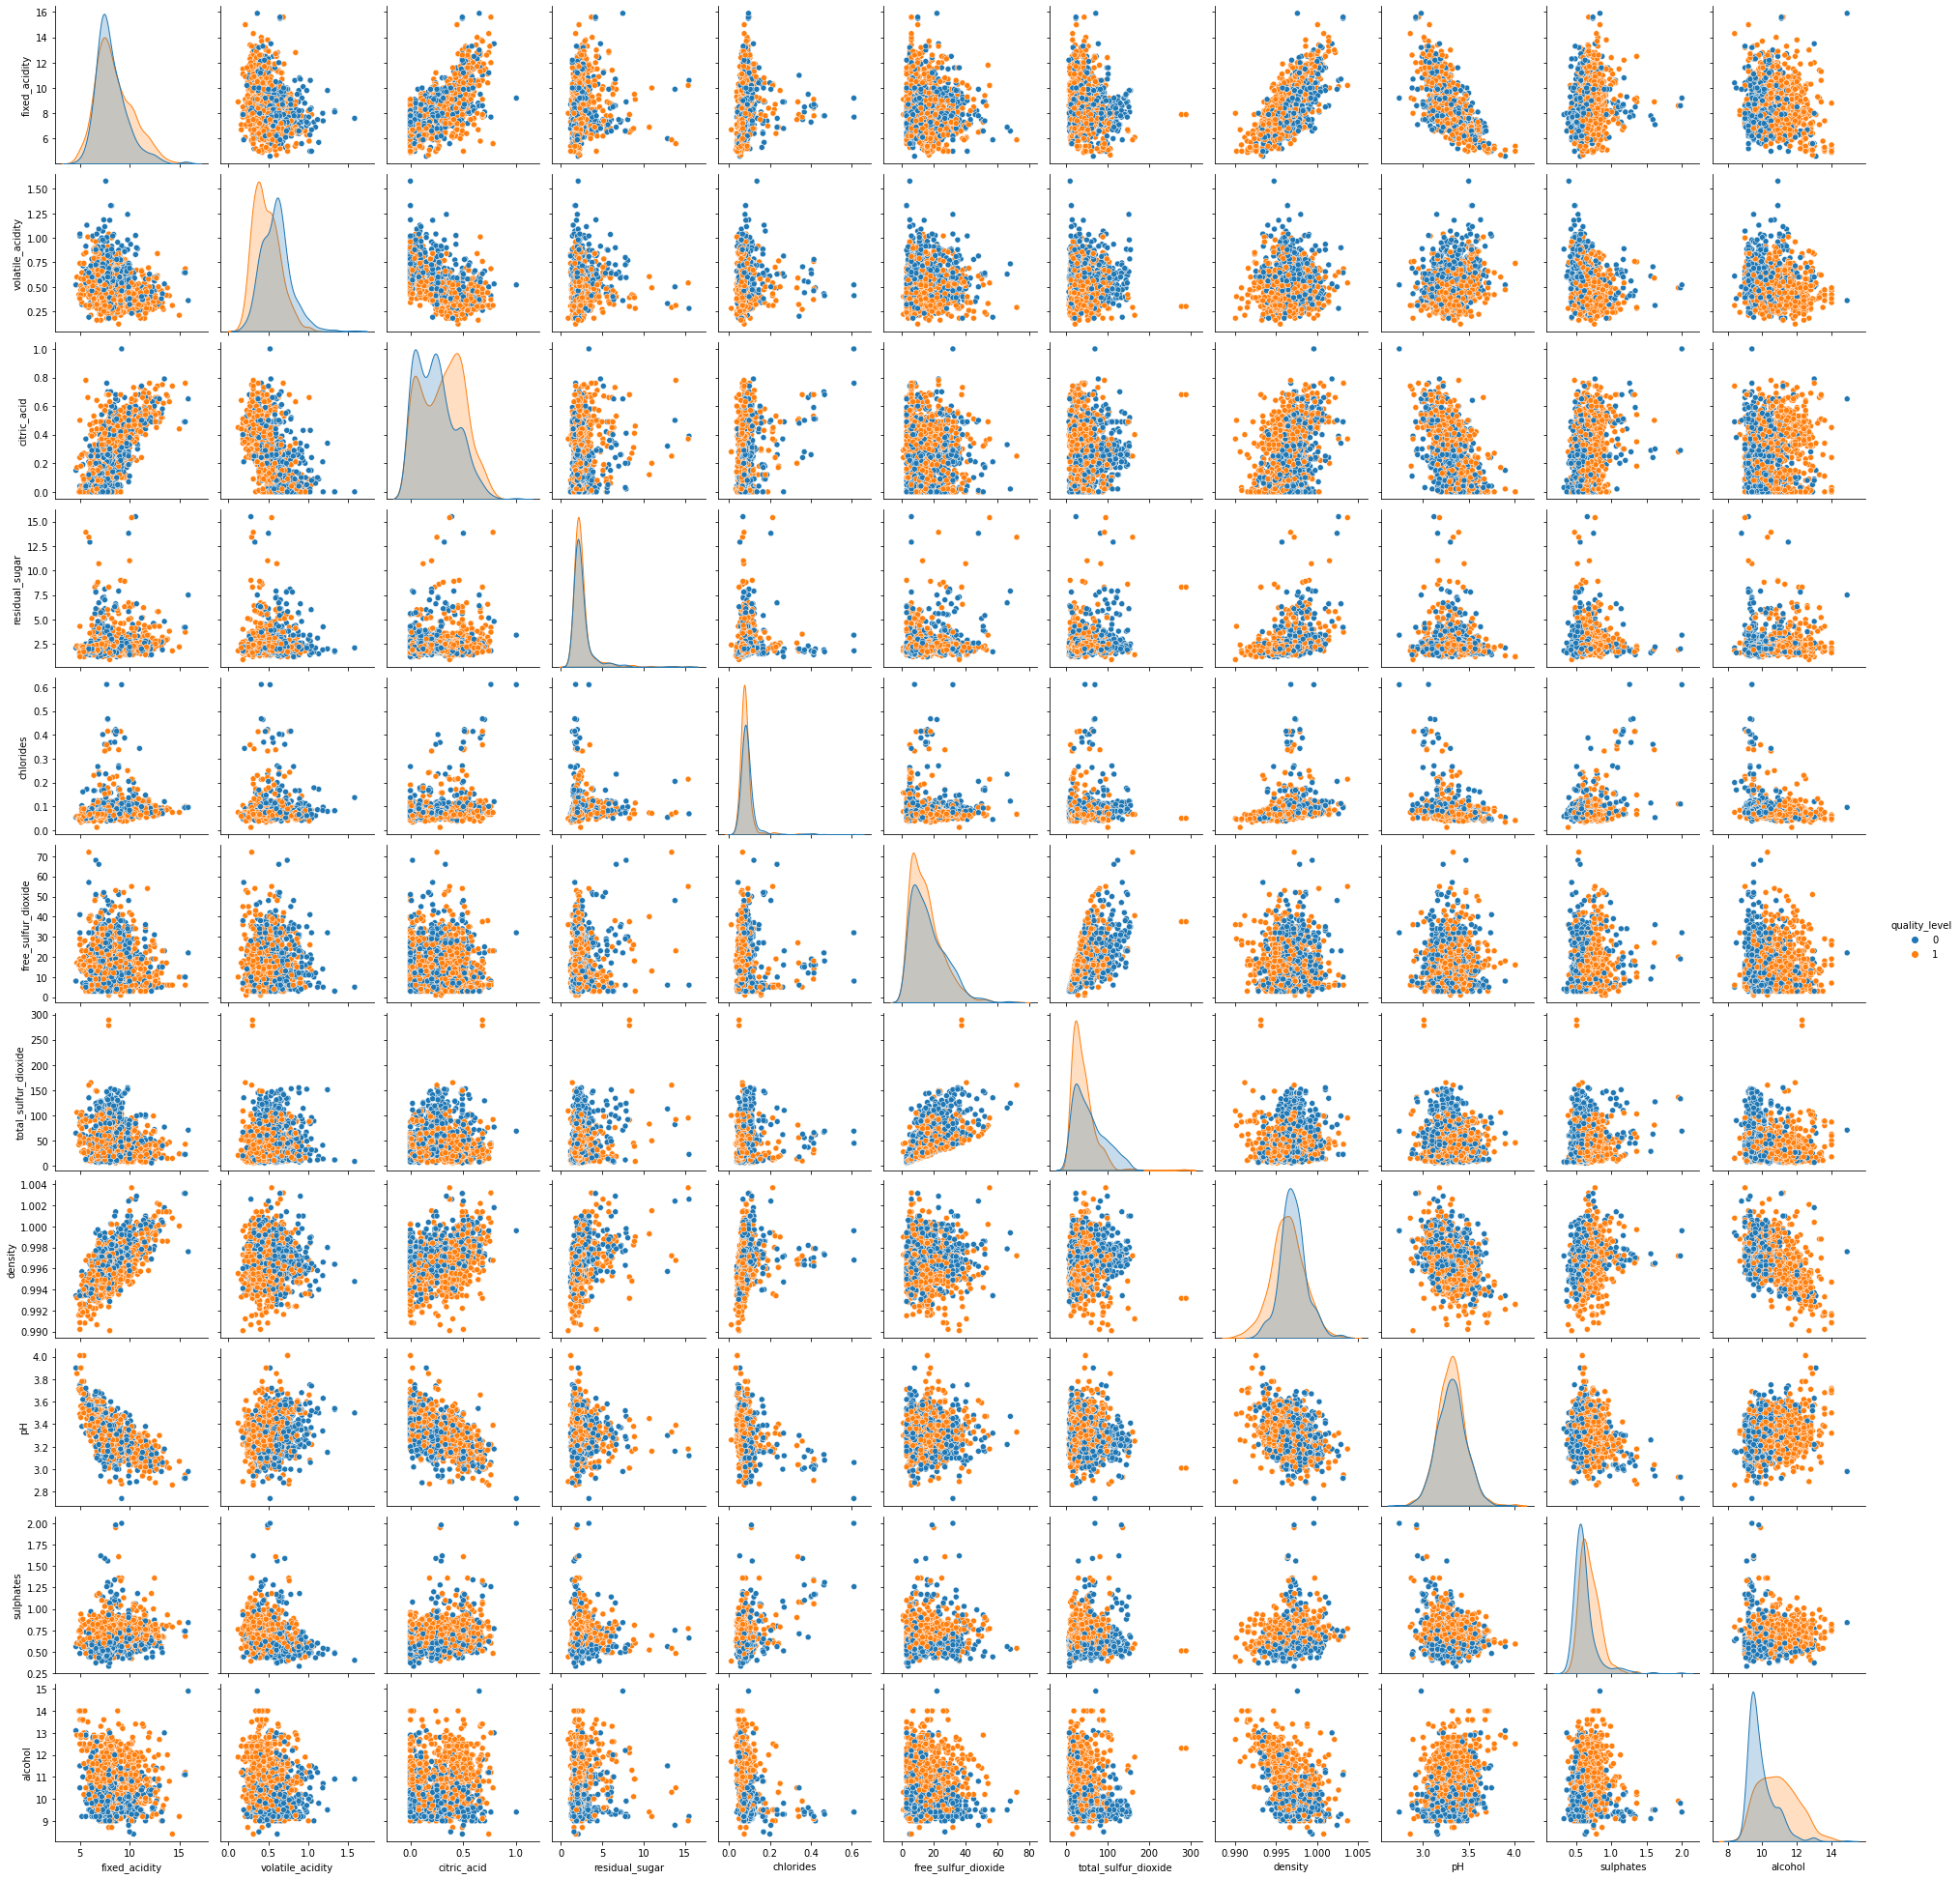

In [18]:
sns.pairplot(data=df, vars=df_col_list, hue='quality_level')

#### Observations:

'density' and 'fixed acidity' have a positive relation. As 'fixed acidity' increases, 'density' also increases.

'alcohol' and 'denisty' have negative relation. As 'acohol' increases 'density' decreases.

'Most of the high quality red wine seems to have lower density. However, the fixed acidity ranges from lowest to high value


<AxesSubplot:>

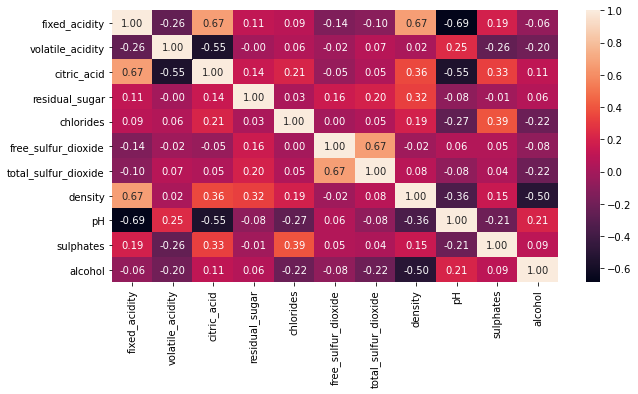

In [19]:
correlation = df[df_col_list].corr()
correlation
plt.figure(figsize=(10,5))
sns.heatmap(correlation, annot=True, fmt='.2f')

#### Observations:

There is no strong correlation between the features. 

Highest positive correlation is between 'fixed acidity' and 'citric acid'; 'fixed acidity' and 'density'; 'total sulfur dioxide' and 'free sulfur dioxide'

Highest negative correlation is between 'pH' and 'fixed acidity'

### Build Logistic Regression Model (using statsmodel library) 

## The equation of the Logistic Regression by which we predict the corresponding probabilities and then go on predict a discrete target variable is
# y = $\frac{1}{1 - {e^{-z}}}$

### Note: z  = $\beta_0$ +${\sum_{i=1}^{n}(\beta_i  X_1)}$

In [20]:
import statsmodels.formula.api as sm

In [21]:
# Copy all the predictor variables into X dataframe
X = df.drop('quality_level', axis=1)
# Copy target into the y dataframe. 
y = df['quality_level']

In [22]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [23]:
train = pd.concat([X_train,y_train], axis=1)
test = pd.concat([X_test,y_test], axis=1)

train.shape, test.shape

((951, 12), (408, 12))

In [24]:
f1='quality_level ~  + fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol'

In [25]:
model1 = sm.logit(formula = f1, data=train).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.491963
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          quality_level   No. Observations:                  951
Model:                          Logit   Df Residuals:                      939
Method:                           MLE   Df Model:                           11
Date:                Fri, 24 Sep 2021   Pseudo R-squ.:                  0.2889
Time:                        18:03:33   Log-Likelihood:                -467.86
converged:                       True   LL-Null:                       -657.92
Covariance Type:            nonrobust   LLR p-value:                 1.007e-74
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -32.9301    108.013     -0.305      0.760    -244.631     178.771
fixed_acidity            0.0492      0.130      0.378      0.705      -0.206       0.304
volatile_acidity        -3.6414      0.660     -5.515      0.000      -4.936      -2.347
citric_acid             -1.0143      0.770     -1.317      0.188      -2.524       0.496
residual_sugar          -0.0627      0.077     -0.810      0.418      -0.214       0.089
chlorides               -3.2520      1.936     -1.680      0.093      -7.046       0.542
free_sulfur_dioxide      0.0245      0.011      2.139      0.032       0.002       0.047
total_sulfur_dioxide    -0.0166      0.004     -3.951      0.000      -0.025      -0.008
density                 25.7368    110.215      0.234      0.815    -190.281     241.754
pH                      -0.6359      0.990     -0.643      0.520      -2.575       1.303
sulphates                2.7757      0.633      4.385      0.000       1.535       4.016
alcohol                  0.9933      0.142      7.006      0.000       0.715       1.271
========================================================================================
"""

In [26]:
# Predict on train
y_train_predict = model1.predict(X_train)

In [27]:
y_class_pred=[]
for i in range(0,len(y_train_predict)):
    if np.array(y_train_predict)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

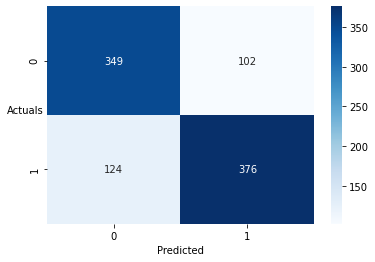

In [28]:
sns.heatmap((confusion_matrix(train['quality_level'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [29]:
print(classification_report(train['quality_level'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.738     0.774     0.755       451
           1      0.787     0.752     0.769       500

    accuracy                          0.762       951
   macro avg      0.762     0.763     0.762       951
weighted avg      0.763     0.762     0.763       951



In [30]:
# Predict on test
y_test_predict = model1.predict(X_test)

In [31]:
y_class_pred_test=[]
for i in range(0,len(y_test_predict)):
    if np.array(y_test_predict)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred_test.append(a)

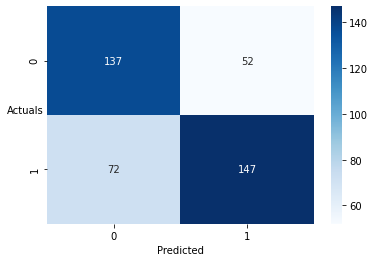

In [32]:
sns.heatmap((confusion_matrix(test['quality_level'],y_class_pred_test)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [33]:
print(classification_report(test['quality_level'],y_class_pred_test,digits=3))

              precision    recall  f1-score   support

           0      0.656     0.725     0.688       189
           1      0.739     0.671     0.703       219

    accuracy                          0.696       408
   macro avg      0.697     0.698     0.696       408
weighted avg      0.700     0.696     0.696       408



### Build SVM Classifier using sklearn

In [34]:
from sklearn.svm import SVC

In [35]:
svm = SVC(kernel = 'linear')

In [36]:
model = svm.fit(X_train,y_train)

In [37]:
pred_svm_train=model.predict(X_train)

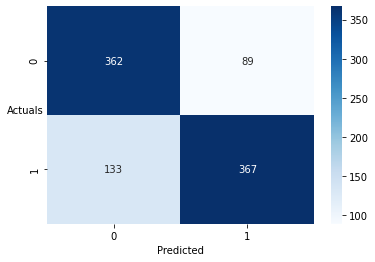

In [38]:
sns.heatmap((confusion_matrix(y_train,pred_svm_train)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [39]:
print(classification_report(y_train,pred_svm_train,digits=3))

              precision    recall  f1-score   support

           0      0.731     0.803     0.765       451
           1      0.805     0.734     0.768       500

    accuracy                          0.767       951
   macro avg      0.768     0.768     0.767       951
weighted avg      0.770     0.767     0.767       951



In [40]:
pred_svm_test=model.predict(X_test)

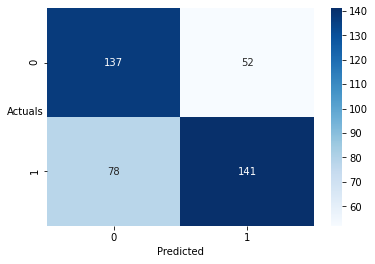

In [41]:
sns.heatmap((confusion_matrix(y_test,pred_svm_test)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [42]:
print(classification_report(y_test,pred_svm_test,digits=3))

              precision    recall  f1-score   support

           0      0.637     0.725     0.678       189
           1      0.731     0.644     0.684       219

    accuracy                          0.681       408
   macro avg      0.684     0.684     0.681       408
weighted avg      0.687     0.681     0.682       408



# ------------------------------------------------------------------------------------------------------

### Clustering- (Kmeans)

As a consumer we look at the texture, alcohol content and acidic content in wine. Hence, based on the pH, density and alcohol content of the red wine lets check if there are 2 types/categories of wine within the dataset

In [43]:
# Creating an object for the StandardScaler function
stdsc = StandardScaler()

In [44]:
scaled_df = stdsc.fit_transform(df[['pH','density','alcohol']])

In [45]:
scaled_df

array([[ 1.29187216,  0.58400336, -0.95437429],
       [-0.70839548,  0.04873719, -0.5845748 ],
       [-0.32124691,  0.15579042, -0.5845748 ],
       ...,
       [ 1.35639693, -0.85050998,  0.7097234 ],
       [ 1.67902074, -0.66316682, -0.21477532],
       [ 0.51757501, -0.6524615 ,  0.52482366]])

#### Calculating WSS for different values of K to decide on number of clusters using Elbow Method

In [46]:
# Empty list to capture within cluster sum of squares for different values of 'K'
wss =[] 

In [47]:
for i in range(1,11):
    KM = KMeans(n_clusters=i, random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [48]:
wss

[4077.0000000000027,
 2573.0084070728017,
 2006.6219464846572,
 1711.9970577491524,
 1472.0124513929152,
 1301.5543037551256,
 1176.9735688200951,
 1070.29119608264,
 995.1502680347214,
 929.1444890531145]

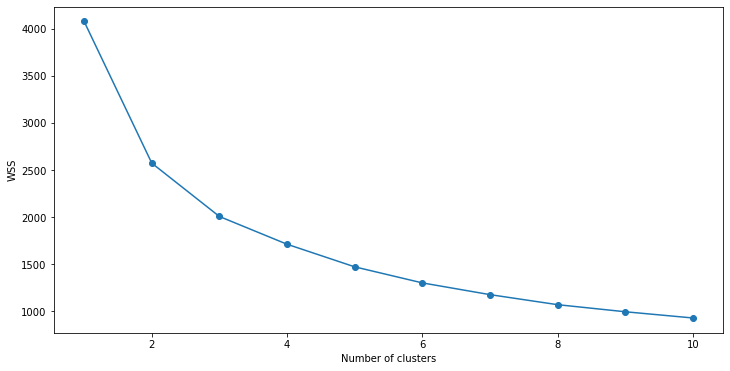

In [49]:
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,11), 'WSS':wss})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['WSS'], marker='o',)
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

#### Observation:

Scree Plot suggests to build either 2 or 3 clusters

Let's evaluate the same using 'silhoutte score'

The silhouette score falls within the range [-1, 1].

The silhouette score of 1 means that the clusters are very dense and nicely separated. The score of 0 means that clusters are overlapping. The score of less than 0 means that data belonging to clusters may be wrong/incorrect.

KMeans with K=2

In [50]:
k_means_2 = KMeans(n_clusters = 2, random_state=10)
k_means_2.fit(scaled_df)
labels_2 = k_means_2.labels_

In [51]:
# Calculating silhouette_score
silhouette_score(scaled_df,labels_2)

0.3506352979923663

KMeans with K=3

In [52]:
k_means_3 = KMeans(n_clusters = 3, random_state=1)
k_means_3.fit(scaled_df)
labels_3 = k_means_3.labels_

In [53]:
# Calculating silhouette_score
silhouette_score(scaled_df,labels_3)

0.2802829385669532

KMeans with K=4

In [54]:
k_means_4 = KMeans(n_clusters = 4, random_state=1)
k_means_4.fit(scaled_df)
labels_4 = k_means_4.labels_

In [55]:
# Calculating silhouette_score
silhouette_score(scaled_df,labels_4)

0.2778563096913138

As silhouette score for 2 clusters is higher, the seperability is better with 2 clusters compared to others. 

In [56]:
df["wine_type"] = labels_2
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_level,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0,1


In [57]:
clust_profile= df.drop('quality_level', axis=1)
clust_profile=clust_profile.groupby('wine_type').mean()
clust_profile['freq']=df['wine_type'].value_counts().sort_index()
clust_profile

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,freq
wine_type,,,,,,,,,,,,
0,7.490405,0.504371,0.239957,2.437100,0.073987,15.796375,38.012793,0.995035,3.387612,0.657484,11.538131,469
1,8.742809,0.542708,0.289393,2.568876,0.095573,15.944382,51.470225,0.997591,3.268775,0.659348,9.849588,890


<AxesSubplot:xlabel='wine_type', ylabel='alcohol'>

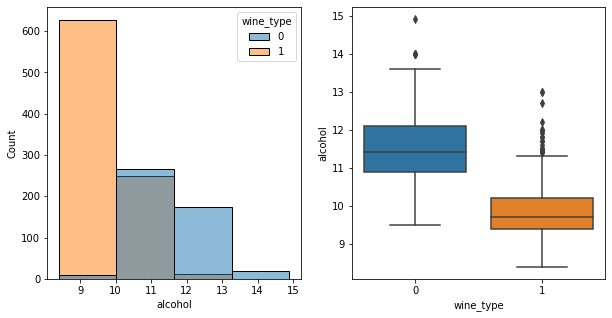

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.histplot(x='alcohol', data=df, hue='wine_type',bins=4,ax=axes[0])
sns.boxplot(x='wine_type', y= 'alcohol', data=df, ax=axes[1])

From above plots we can see that the median alcohol content of wine_type "1" is much lower compared to wine_type "0"

Let's create 2 dataframes based on the clusters created and build the classification models

In [59]:
df_1 = df[df['wine_type'] == 0].copy()
df_2 = df[df['wine_type'] == 1].copy()

In [60]:
df_1.drop('wine_type', axis=1, inplace=True)

In [61]:
df_1.shape

(469, 12)

In [62]:
df_2.drop('wine_type', axis=1, inplace=True)

In [63]:
df_2.shape

(890, 12)

In [64]:
df_1['quality_level'].value_counts(1)

1    0.75693
0    0.24307
Name: quality_level, dtype: float64

In [65]:
df_2['quality_level'].value_counts(1)

0    0.591011
1    0.408989
Name: quality_level, dtype: float64

### Classification Model for the 1st dataframe using Logistic Regression

In [66]:
# Copy all the predictor variables into X dataframe
X1 = df_1.drop('quality_level', axis=1)
# Copy target into the y dataframe. 
y1 = df_1['quality_level']

In [67]:
# Split X and y into training and test set in 70:30 ratio
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30 , random_state=1)

In [68]:
train1 = pd.concat([X1_train,y1_train], axis=1)
test1 = pd.concat([X1_test,y1_test], axis=1)

train1.shape, test1.shape

((328, 12), (141, 12))

In [69]:
f1= 'quality_level ~  + fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol'

In [70]:
model_1 = sm.logit(formula = f1, data=train1).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.413068
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          quality_level   No. Observations:                  328
Model:                          Logit   Df Residuals:                      316
Method:                           MLE   Df Model:                           11
Date:                Fri, 24 Sep 2021   Pseudo R-squ.:                  0.2369
Time:                        18:03:36   Log-Likelihood:                -135.49
converged:                       True   LL-Null:                       -177.56
Covariance Type:            nonrobust   LLR p-value:                 2.323e-13
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               72.8542    233.881      0.312      0.755    -385.545     531.253
fixed_acidity           -0.1636      0.298     -0.549      0.583      -0.748       0.421
volatile_acidity        -1.3614      0.982     -1.386      0.166      -3.286       0.564
citric_acid              0.4380      1.384      0.317      0.752      -2.274       3.150
residual_sugar          -0.2021      0.178     -1.135      0.256      -0.551       0.147
chlorides                1.4916      8.619      0.173      0.863     -15.402      18.385
free_sulfur_dioxide      0.0394      0.022      1.771      0.077      -0.004       0.083
total_sulfur_dioxide    -0.0145      0.008     -1.876      0.061      -0.030       0.001
density                -73.3049    237.822     -0.308      0.758    -539.427     392.818
pH                      -3.2439      1.865     -1.739      0.082      -6.900       0.412
sulphates                5.7780      1.742      3.317      0.001       2.364       9.192
alcohol                  0.9561      0.302      3.170      0.002       0.365       1.547
========================================================================================
"""

In [71]:
# Predict on train
y_train_predict = model_1.predict(X1_train)

In [72]:
y_class_pred=[]
for i in range(0,len(y_train_predict)):
    if np.array(y_train_predict)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

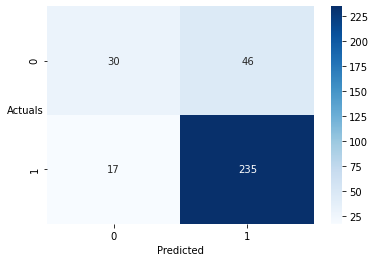

In [73]:
sns.heatmap((confusion_matrix(train1['quality_level'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [74]:
print(classification_report(train1['quality_level'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.638     0.395     0.488        76
           1      0.836     0.933     0.882       252

    accuracy                          0.808       328
   macro avg      0.737     0.664     0.685       328
weighted avg      0.790     0.808     0.791       328



In [75]:
# Predict on test
y_test_predict = model_1.predict(X1_test)

In [76]:
y_class_pred_test_1df=[]
for i in range(0,len(y_test_predict)):
    if np.array(y_test_predict)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred_test_1df.append(a)

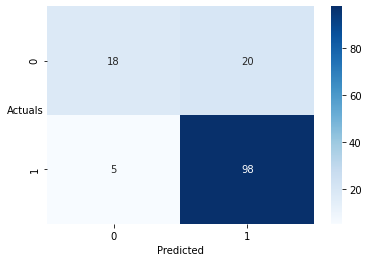

In [77]:
sns.heatmap((confusion_matrix(test1['quality_level'],y_class_pred_test_1df)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [78]:
print(classification_report(test1['quality_level'],y_class_pred_test_1df,digits=3))

              precision    recall  f1-score   support

           0      0.783     0.474     0.590        38
           1      0.831     0.951     0.887       103

    accuracy                          0.823       141
   macro avg      0.807     0.713     0.739       141
weighted avg      0.818     0.823     0.807       141



### Build SVM Classifier on the 1st DataFrame

In [79]:
svm1 = SVC(kernel = 'linear')

In [80]:
model_svm = svm1.fit(X1_train, y1_train)

In [81]:
pred_train=svm1.predict(X1_train)

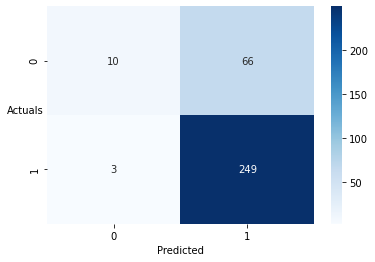

In [82]:
sns.heatmap((confusion_matrix(y1_train,pred_train)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [83]:
print(classification_report(y1_train,pred_train,digits=3))

              precision    recall  f1-score   support

           0      0.769     0.132     0.225        76
           1      0.790     0.988     0.878       252

    accuracy                          0.790       328
   macro avg      0.780     0.560     0.552       328
weighted avg      0.786     0.790     0.727       328



In [84]:
pred_test=svm1.predict(X1_test)

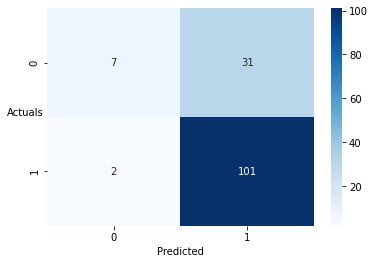

In [85]:
sns.heatmap((confusion_matrix(y1_test,pred_test)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [86]:
print(classification_report(y1_test,pred_test,digits=3))

              precision    recall  f1-score   support

           0      0.778     0.184     0.298        38
           1      0.765     0.981     0.860       103

    accuracy                          0.766       141
   macro avg      0.771     0.582     0.579       141
weighted avg      0.769     0.766     0.708       141



### Classification Model for the 2nd dataframe using Logistic Regression

In [87]:
# Copy all the predictor variables into X dataframe
X2 = df_2.drop('quality_level', axis=1)
# Copy target into the y dataframe. 
y2 = df_2['quality_level']

In [88]:
# Split X and y into training and test set in 70:30 ratio
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30 , random_state=1)

In [89]:
train2 = pd.concat([X2_train,y2_train], axis=1)
test2 = pd.concat([X2_test,y2_test], axis=1)

train2.shape, test2.shape

((623, 12), (267, 12))

In [90]:
f1='quality_level ~  + fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol'

In [91]:
model_21 = sm.logit(formula = f1, data=train2).fit()
model_21.summary()

Optimization terminated successfully.
         Current function value: 0.547899
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          quality_level   No. Observations:                  623
Model:                          Logit   Df Residuals:                      611
Method:                           MLE   Df Model:                           11
Date:                Fri, 24 Sep 2021   Pseudo R-squ.:                  0.1902
Time:                        18:03:37   Log-Likelihood:                -341.34
converged:                       True   LL-Null:                       -421.53
Covariance Type:            nonrobust   LLR p-value:                 1.123e-28
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -172.4717    134.169     -1.285      0.199    -435.438      90.494
fixed_acidity           -0.0296      0.155     -0.190      0.849      -0.334       0.275
volatile_acidity        -3.3448      0.764     -4.376      0.000      -4.843      -1.847
citric_acid             -1.1986      0.866     -1.385      0.166      -2.895       0.498
residual_sugar           0.0457      0.083      0.551      0.582      -0.117       0.208
chlorides               -2.3193      2.005     -1.157      0.247      -6.249       1.611
free_sulfur_dioxide      0.0215      0.013      1.596      0.111      -0.005       0.048
total_sulfur_dioxide    -0.0217      0.005     -4.421      0.000      -0.031      -0.012
density                166.2896    137.608      1.208      0.227    -103.418     435.997
pH                      -0.4905      1.156     -0.424      0.671      -2.756       1.775
sulphates                1.7189      0.587      2.928      0.003       0.568       2.869
alcohol                  1.0029      0.191      5.255      0.000       0.629       1.377
========================================================================================
"""

In [92]:
# Predict on train
y_train_predict = model_21.predict(X2_train)

In [93]:
y_class_pred=[]
for i in range(0,len(y_train_predict)):
    if np.array(y_train_predict)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

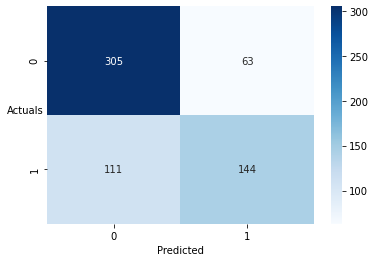

In [94]:
sns.heatmap((confusion_matrix(train2['quality_level'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [95]:
print(classification_report(train2['quality_level'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.733     0.829     0.778       368
           1      0.696     0.565     0.623       255

    accuracy                          0.721       623
   macro avg      0.714     0.697     0.701       623
weighted avg      0.718     0.721     0.715       623



In [96]:
# Predict on test
y_test_predict_2 = model_21.predict(X2_test)

In [97]:
y_class_pred_test_2df=[]
for i in range(0,len(y_test_predict_2)):
    if np.array(y_test_predict_2)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred_test_2df.append(a)

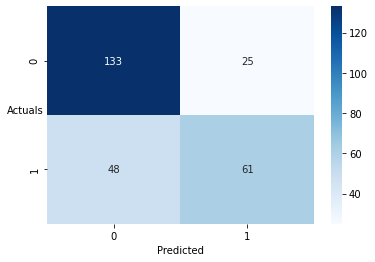

In [98]:
sns.heatmap((confusion_matrix(test2['quality_level'],y_class_pred_test_2df)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [99]:
print(classification_report(test2['quality_level'],y_class_pred_test_2df,digits=3))

              precision    recall  f1-score   support

           0      0.735     0.842     0.785       158
           1      0.709     0.560     0.626       109

    accuracy                          0.727       267
   macro avg      0.722     0.701     0.705       267
weighted avg      0.724     0.727     0.720       267



### Build SVM Classifeir on the 2nd DataFrame

In [100]:
svm2 = SVC(kernel = 'linear')

In [101]:
Model_2=svm2.fit(X2_train,y2_train)

In [102]:
pred_train1=svm2.predict(X2_train)

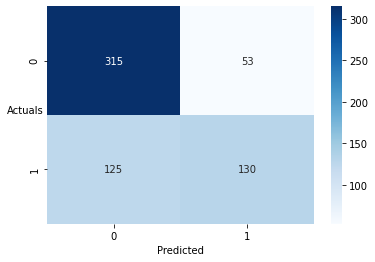

In [103]:
sns.heatmap((confusion_matrix(y2_train,pred_train1)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [104]:
print(classification_report(y2_train,pred_train1,digits=3))

              precision    recall  f1-score   support

           0      0.716     0.856     0.780       368
           1      0.710     0.510     0.594       255

    accuracy                          0.714       623
   macro avg      0.713     0.683     0.687       623
weighted avg      0.714     0.714     0.704       623



In [105]:
pred_test1=svm2.predict(X2_test)

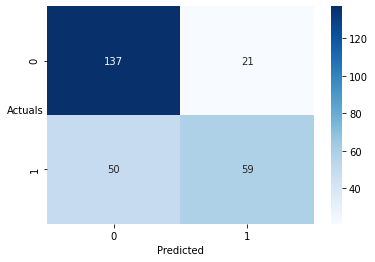

In [106]:
sns.heatmap((confusion_matrix(y2_test,pred_test1)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [107]:
print(classification_report(y2_test,pred_test1,digits=3))

              precision    recall  f1-score   support

           0      0.733     0.867     0.794       158
           1      0.738     0.541     0.624       109

    accuracy                          0.734       267
   macro avg      0.735     0.704     0.709       267
weighted avg      0.735     0.734     0.725       267

